In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Clipping profile

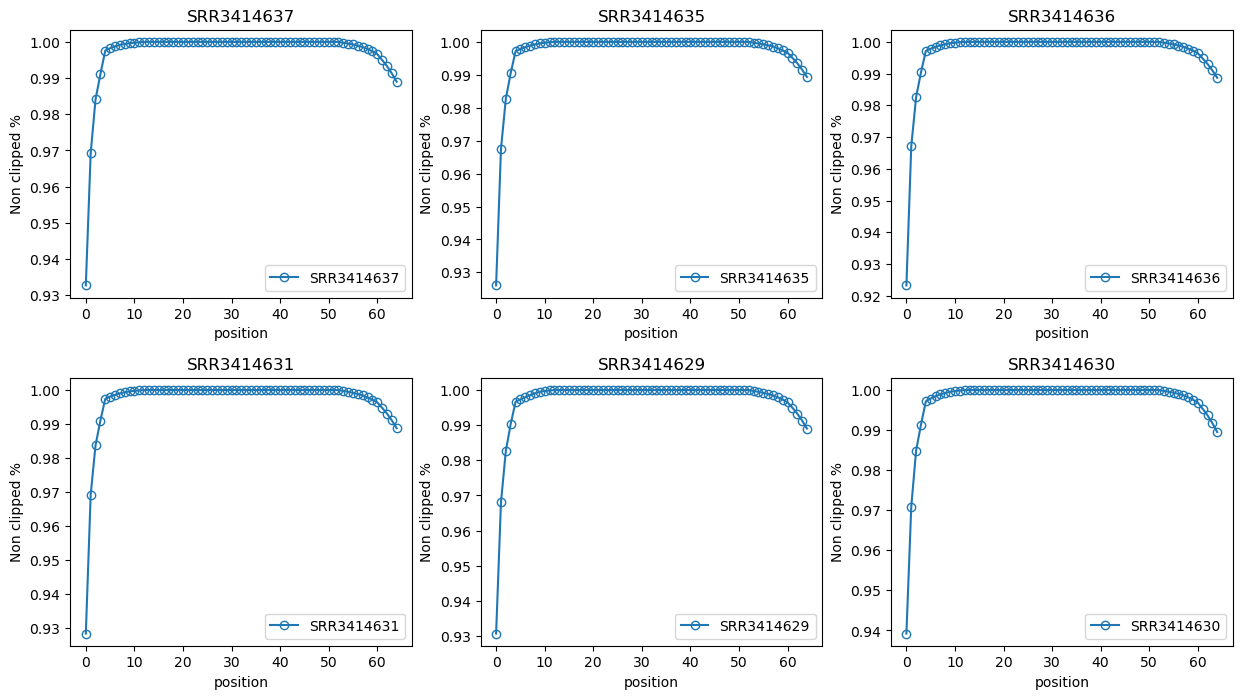

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'hspace': 0.3})

profile_name = 'cliping_profile'
ext = 'xls'

df_list = list()
sample_names = list()
files = glob.glob(f'../RSeQCresults/{profile_name}/*.{ext}')

for ax, file in zip(axes.flatten(), files):
    sample_name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, sep='\t', index_col=0)
    df['percent'] = df['Non_clipped_nt'] / df.sum(axis=1)
    ax.plot(df['percent'], '-o', fillstyle='none', label=sample_name)
    ax.legend()
    ax.set_title(sample_name)
    ax.set_xlabel('position')
    ax.set_ylabel("Non clipped %")

## Delition profile

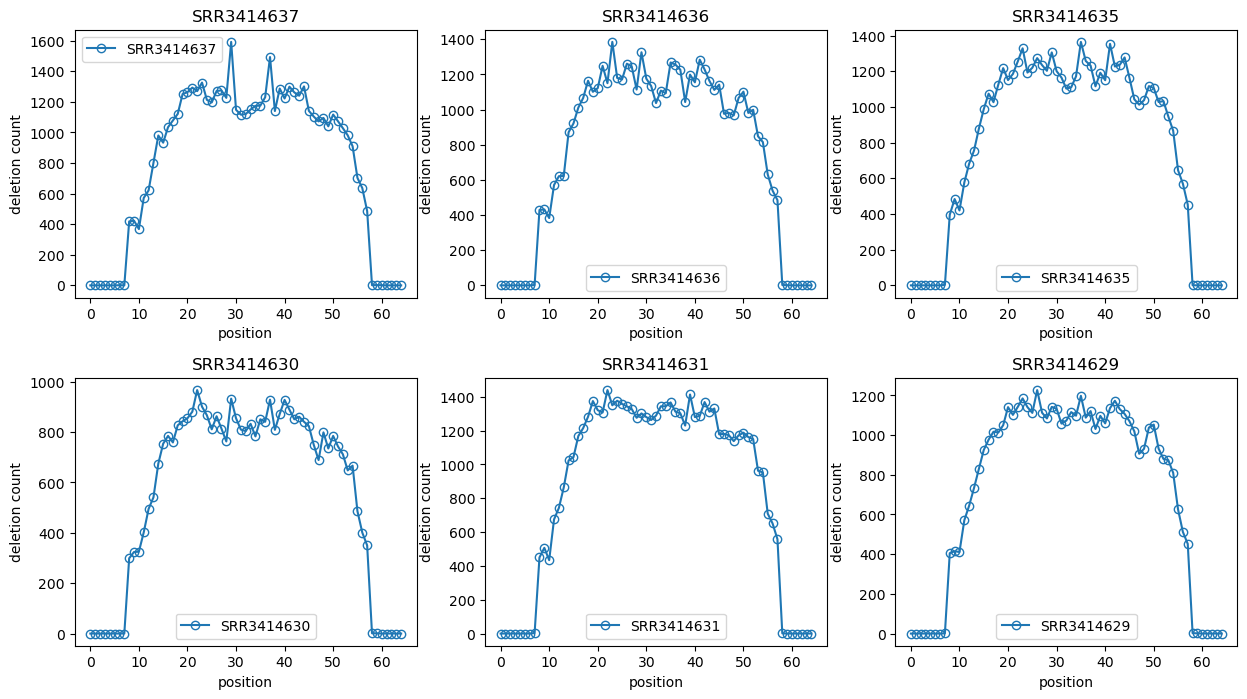

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'hspace': 0.3})

profile_name = 'delition_profile'
ext = 'txt'

df_list = list()
sample_names = list()
files = glob.glob(f'../RSeQCresults/{profile_name}/*.{ext}')

for ax, file in zip(axes.flatten(), files):
    sample_name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, sep='\t', index_col=0)
    ax.plot(df['deletion_count'], '-o', fillstyle='none', label=sample_name)
    ax.legend()
    ax.set_title(sample_name)
    ax.set_xlabel('position')
    ax.set_ylabel("deletion count")

## Insertion profile

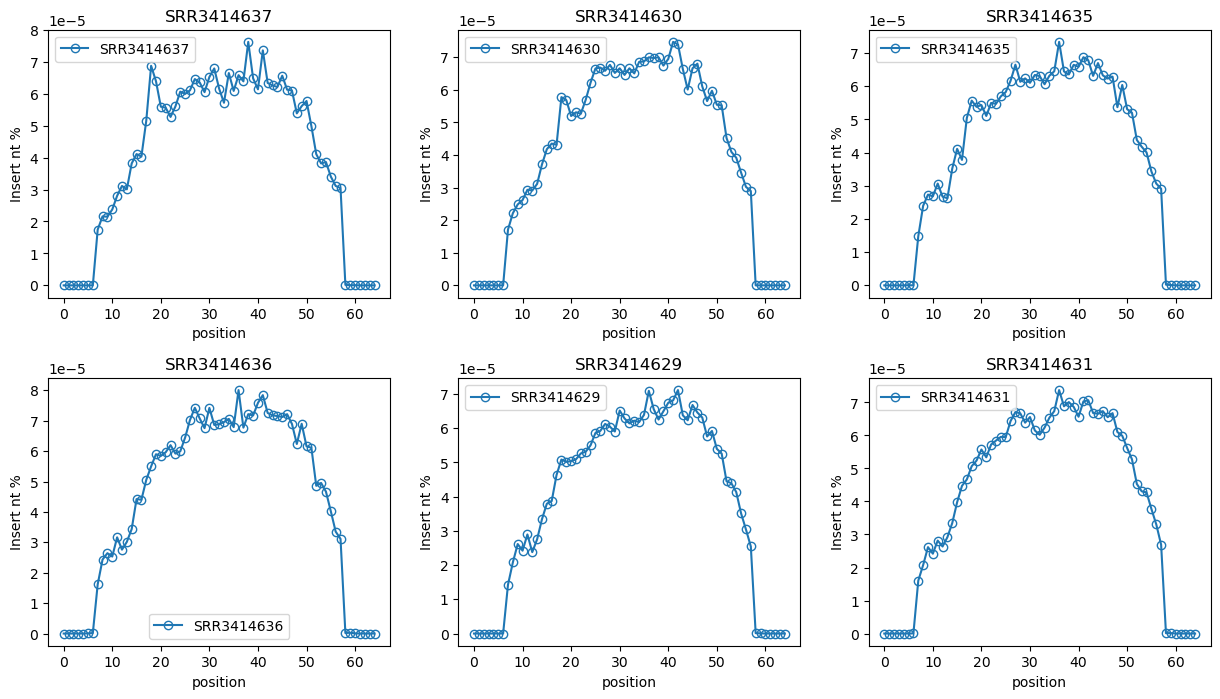

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'hspace': 0.3})

profile_name = 'insertion_profile'
ext = 'xls'

df_list = list()
sample_names = list()
files = glob.glob(f'../RSeQCresults/{profile_name}/*.{ext}')

for ax, file in zip(axes.flatten(), files):
    sample_name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, sep='\t', index_col=0)
    df['percent'] = df['Insert_nt'] / df.sum(axis=1)
    ax.plot(df['percent'], '-o', fillstyle='none', label=sample_name)
    ax.legend()
    ax.set_title(sample_name)
    ax.set_xlabel('position')
    ax.set_ylabel("Insert nt %")

## Duplication profile

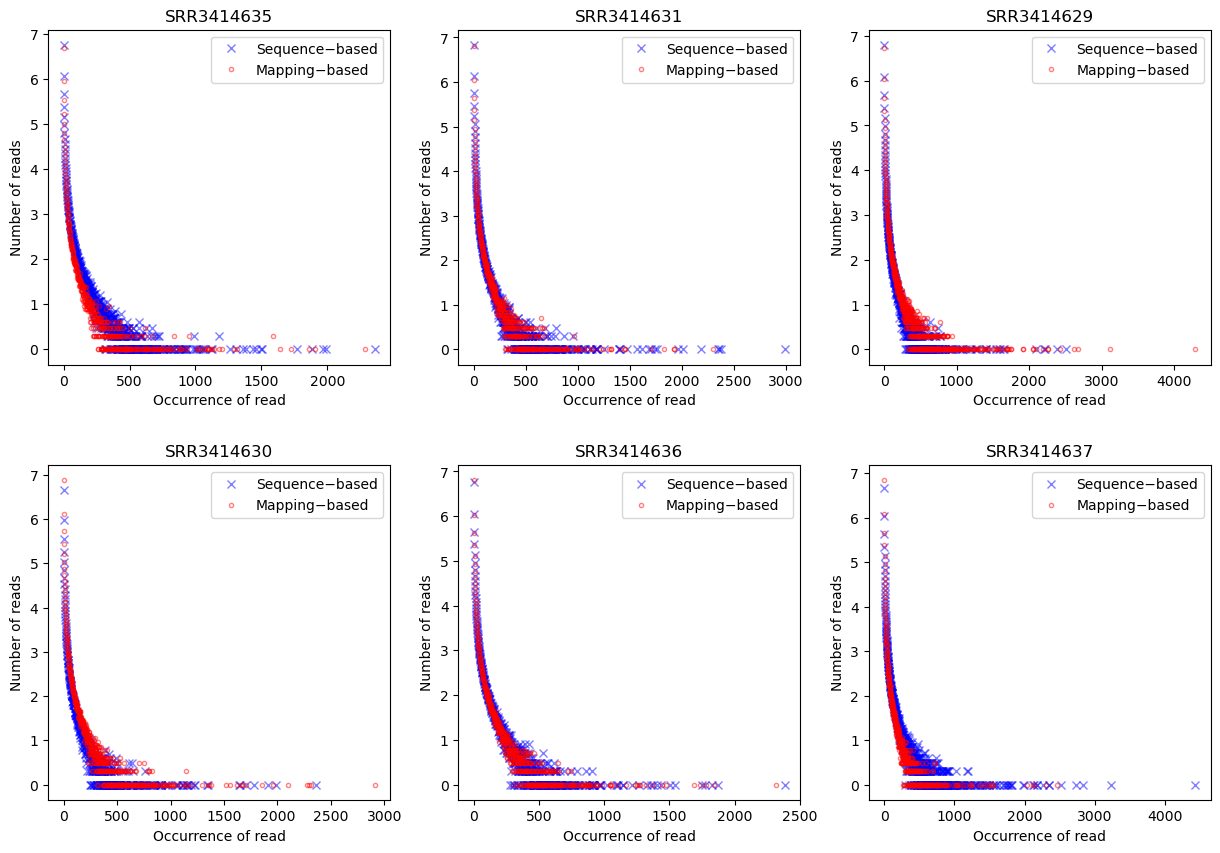

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'hspace': 0.3}, dpi=100)

profile_name = 'duplication_profile'
ext = 'xls'

df_list = list()
sample_names = list()
pos_files = glob.glob(f'../RSeQCresults/{profile_name}/*pos*.{ext}')
seq_files = glob.glob(f'../RSeQCresults/{profile_name}/*seq*.{ext}')

for ax, pos_file, seq_file in zip(axes.flatten(), pos_files, seq_files):
    sample_name = pos_file.split('/')[-1].split('.')[0]
    df_pos = pd.read_csv(pos_file, sep='\t', index_col=0)
    df_seq = pd.read_csv(seq_file, sep='\t', index_col=0)
    ax.plot(np.log10(df_pos), 'bx', label='Sequence−based', alpha=0.5)
    ax.plot(np.log10(df_seq), 'r.', label='Mapping−based', alpha=0.5, fillstyle='none')
    ax.legend()
    ax.set_title(sample_name)
    ax.set_xlabel('Occurrence of read')
    ax.set_ylabel("Number of reads")

## Mismatch profile

/home/claptar/anaconda3/envs/preprocess/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


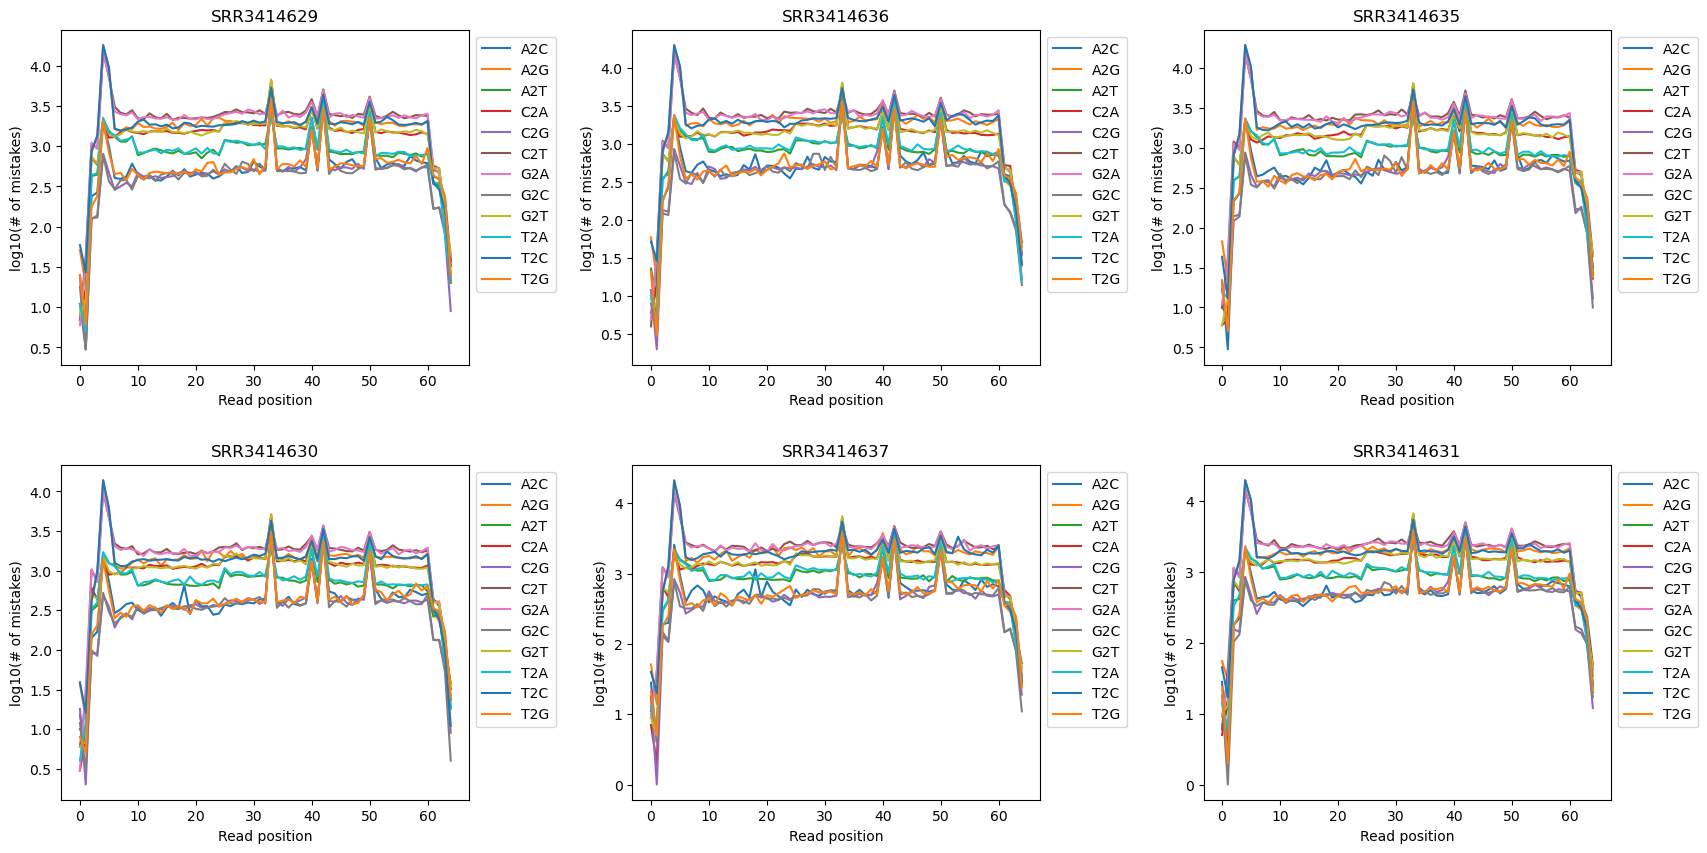

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.4}, dpi=100)

profile_name = 'mismatch_profile'
ext = 'xls'

df_list = list()
sample_names = list()
files = glob.glob(f'../RSeQCresults/{profile_name}/*.{ext}')

for ax, file in zip(axes.flatten(), files):
    sample_name = file.split('/')[-1].split('.')[0]
    try:
        df = pd.read_csv(file, sep='\t', index_col=0)
    except:
        df = pd.read_csv(file, sep='\t', index_col=0, skiprows=1)
    df.drop('sum', inplace=True, axis=1)
    ax.plot(np.log10(df), '-', fillstyle='none')
    ax.legend(df.columns, fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
    ax.set_title(sample_name)
    ax.set_xlabel('Read position')
    ax.set_ylabel("log10(# of mistakes)")